In [1]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
iris = fetch_ucirepo(id=53)
df = pd.DataFrame(iris.data.features)
df['class'] = iris.data.targets

In [4]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#this is to replace strings with numeric data
one_hot_encoded=pd.get_dummies(df['class'])
one_hot_encoded

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [8]:
#adds the new stuff to the chart
df=pd.concat([df, one_hot_encoded],axis=1)
df

,sepal length,sepal width,petal length,petal width,class,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,True,False,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,True,False,False,True,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,True,False,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,True,False,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,False,False,True,False,False,True
146,6.3,2.5,5.0,1.9,Iris-virginica,False,False,True,False,False,True
147,6.5,3.0,5.2,2.0,Iris-virginica,False,False,True,False,False,True
148,6.2,3.4,5.4,2.3,Iris-virginica,False,False,True,False,False,True


In [18]:
df = df.drop('class', axis = 1)

KeyError: "['class'] not found in axis"

In [19]:
df


,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True,False,False,True


In [20]:
df = df.drop('Iris-setosa', axis = 1)
df

,sepal length,sepal width,petal length,petal width,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,False,False,False,False
1,4.9,3.0,1.4,0.2,False,False,False,False
2,4.7,3.2,1.3,0.2,False,False,False,False
3,4.6,3.1,1.5,0.2,False,False,False,False
4,5.0,3.6,1.4,0.2,False,False,False,False
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,True,False,True
146,6.3,2.5,5.0,1.9,False,True,False,True
147,6.5,3.0,5.2,2.0,False,True,False,True
148,6.2,3.4,5.4,2.3,False,True,False,True


In [22]:
df = df.drop('Iris-versicolor',  axis = 1)
df

,sepal length,sepal width,petal length,petal width,Iris-virginica,Iris-virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,True,True
146,6.3,2.5,5.0,1.9,True,True
147,6.5,3.0,5.2,2.0,True,True
148,6.2,3.4,5.4,2.3,True,True


In [23]:
df = df.drop('Iris-virginica', axis = 1)
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [25]:
df


,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [26]:
corr_mat = df.corr()

<Axes: >

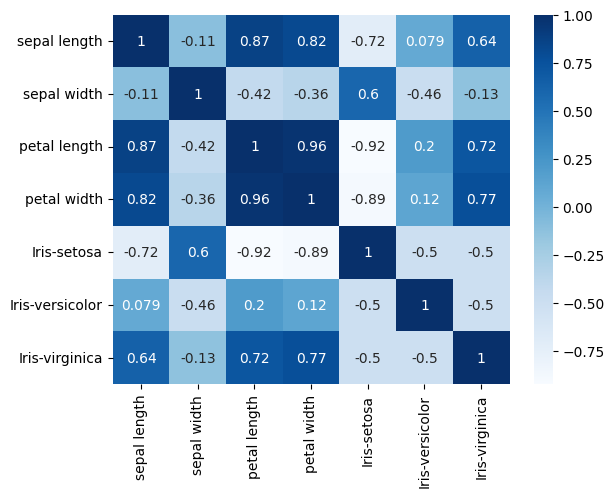

In [27]:
sns.heatmap(corr_mat, cmap = 'Blues', annot = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d625184b040>,
 'caps': [<matplotlib.lines.Line2D at 0x7d625184aa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d625184ba90>,
 'medians': [<matplotlib.lines.Line2D at 0x7d625184a140>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d625184aad0>,
 'means': []}

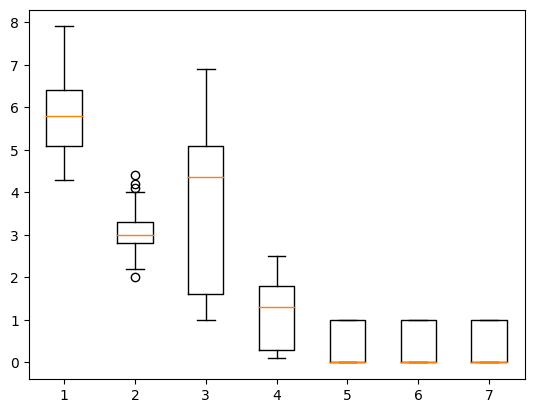

In [29]:
plt.boxplot(df)

In [30]:
shuffled_df = df.sample(n = len(df))
shuffled_df

,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica
52,6.9,3.1,4.9,1.5,False,True,False
58,6.6,2.9,4.6,1.3,False,True,False
115,6.4,3.2,5.3,2.3,False,False,True
13,4.3,3.0,1.1,0.1,True,False,False
108,6.7,2.5,5.8,1.8,False,False,True
...,...,...,...,...,...,...,...
56,6.3,3.3,4.7,1.6,False,True,False
85,6.0,3.4,4.5,1.6,False,True,False
9,4.9,3.1,1.5,0.1,True,False,False
7,5.0,3.4,1.5,0.2,True,False,False


In [32]:
x_train, x_test, y_train, y_test = train_test_split(shuffled_df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']], shuffled_df.loc[:,['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']], test_size = 0.2)

In [37]:
param_grid = {'n_estimators': [50, 100, 300], 'max_depth': [None, 5, 10], 'min_samples_leaf': [None, 1, 5]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid)

In [38]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [None, 1, 5],
                         'n_estimators': [50, 100, 300]})

In [51]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

In [52]:
rf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, n_estimators = 100)
rf.fit(x_train, y_train)


RandomForestClassifier()

In [53]:
pred_y_train= rf.predict(x_train)
pred_y_test = rf.predict(x_test)

In [59]:
class_true = []
for row in np.array(y_train):
    if row[0] == 1:
        class_true.append("Iris-setosa")
    if row[1] == 1:
        class_true.append("Iris-versicolor")
    if row[2] == 1:
        class_true.append("Iris-virginica")
class_pred = []
for row in np.array(pred_y_train):
    if row[0] == 1:
        class_pred.append("Iris-setosa")
    if row[1] == 1:
        class_pred.append("Iris-versicolor")
    if row[2] == 1:
        class_pred.append("Iris-virginica")

In [63]:
confusion_matrix(class_true, class_pred)

array([[36,  0,  0],
       [ 0, 43,  0],
       [ 0,  0, 41]])

In [65]:
class_true = []
for row in np.array(y_test):
    if row[0] == 1:
        class_true.append("Iris-setosa")
    if row[1] == 1:
        class_true.append("Iris-versicolor")
    if row[2] == 1:
        class_true.append("Iris-virginica")
class_pred = []
for row in np.array(pred_y_test):
    if row[0] == 1:
        class_pred.append("Iris-setosa")
    if row[1] == 1:
        class_pred.append("Iris-versicolor")
    if row[2] == 1:
        class_pred.append("Iris-virginica")

In [66]:
confusion_matrix(class_true, class_pred)

array([[14,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  8]])

<h1>Complete the following:</h1>
<ol>
  <li>Produce a heatmap that shows the correlations within the data.</li>
    <ul>
      <li>The code for doing this is provided in <strong>Day 1 Notebook</strong>.</li>
      <li>You can find documentation for heatmapping in seaborn <a href = "https://seaborn.pydata.org/generated/seaborn.heatmap.html">here</a></li>
      <li>Hint: A heatmap cannot process text data. You need to either select for just numeric data or transform your text data into numeric data.</li>
    </ul>
  <li>Produce a boxplot that shows the ranges for each of the different numeric columns.</li>
    <ul>
      <li>The documentation for how to create a boxplot using matplotlib.pyplot is <a href = "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html">here</a>.
    </ul>
  <li>Split your data into training and testing data, making sure that you shuffle it.</li>
    <ul>
      <li>We saw how to do this in <strong>Day 3 Notebook</strong>.</li>
      <li>The documentation for train_test_split is <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">here</a>.</li>
    </ul>
  <li>Create a grid of different hyperparameter values for n_estimators, max_depth, and random_state for a Random Forest classifier.</li>
    <ul>
      <li>This is the most difficult step! We saw how to do this in <strong>Day 3 Notebook</strong>.</li>
      <li>The documentation for grid search can be found <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">here</a>.</li>
      <li>The documentation for Random Forest Classifier can be found <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">here</a> with a list of <strong>potential hyperparameters</strong> to use.</li>
    </ul>
  <li>Use the best hyperparameters to train a Random Forest classifier.</li>
    <ul>
      <li>We saw how to do this in <strong>Day 3 Notebook</strong>.</li>
      <li>You can determine what the best parameters are using <strong>.best_params_</strong> after performing a grid search.</li>
    </ul>
  <li>Use a confusion matrix to calculate the accuracy of your predictions.</li>
    <ul>
      <li>We saw how to do this in <strong>Day 3 Notebook</strong>.</li>
      <li>The documentation for confusion matrices can be found <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">here</a>.</li>
    </ul>
</ol>
<br /><br />
Try your best to tackle these problems step by step. Ask for help. Every package and function you need is imported and every line of code necessary to complete this project can be found within the lecture notebooks. Take a deep breath -- you all have the skills to do this!